In [1]:
import yaml

data = {
    'path': "car_dataset/archive",
    'test': 'images/test/',
    'train': 'images/train/',
    'val': 'images/test/',
    'nc': 1,
    'names': ['car']
}

with open('car_dataset/data.yaml', 'w') as file:
    yaml.dump(data, file, sort_keys=False)

In [2]:
import os
import random
import shutil

# Define paths
images_dir = "car_dataset/images"
labels_dir = "car_dataset/labels"

image_val = os.path.join(images_dir, "val")
image_test = os.path.join(images_dir, "test")

label_val = os.path.join(labels_dir, "val")
label_test = os.path.join(labels_dir, "test")

# Create test directories if they don't exist
os.makedirs(image_test, exist_ok=True)
os.makedirs(label_test, exist_ok=True)

# Get all image files from val (assuming .png/.jpg)
val_images = [os.path.join(image_val, f) for f in os.listdir(image_val) if f.endswith((".png", ".jpg", ".jpeg"))]
random.shuffle(val_images)  # Shuffle randomly

# Calculate 50% split
split_idx = len(val_images) // 2
test_images = val_images[:split_idx]
remaining_val_images = val_images[split_idx:]

# Move images + labels to test/val
for img_path in test_images:
    # Get corresponding label (e.g., 1.jpg -> 1.txt)
    filename = os.path.basename(img_path)
    label_name = os.path.splitext(filename)[0] + ".txt"
    label_path = os.path.join(label_val, label_name)

    # Move image to test
    shutil.move(img_path, os.path.join(image_test, filename))
    
    # Move label to test (if exists)
    if os.path.exists(label_path):
        shutil.move(label_path, os.path.join(label_test, label_name))
    else:
        print(f"Warning: Label {label_path} not found!")

print(f"Moved {len(test_images)} images (and labels) from val → test.")
print(f"Remaining val files: {len(remaining_val_images)} images.")

Moved 49 images (and labels) from val → test.
Remaining val files: 50 images.


In [3]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
total_layers = sum(1 for _ in model.model.named_parameters())  # Count layers
print(f"Total trainable layers: {total_layers}")

Total trainable layers: 184


In [1]:
from ultralytics import YOLO

# Load the YOLOv8 model (pre-trained on COCO)
model = YOLO('runs/detect/cars_0_1_transfer/weights/best.pt')  
path_to_data_yaml = "car_dataset/data.yaml"
# Train the model on the custom dataset
results = model.train(
    data=path_to_data_yaml,  
    epochs=16,                      # Number of epochs to train
    batch=100,                       # Batch size
    imgsz=640,                      # Image size
    #freeze=10,                      # Freeze backbone
    plots=True,                     # Generate plots
    # resume=True,
    device=0                        # Use GPU (set -1 for CPU)
)

New https://pypi.org/project/ultralytics/8.3.102 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.96  Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine\trainer: task=detect, mode=train, model=runs/detect/cars_0_1_transfer/weights/best.pt, data=car_dataset/data.yaml, epochs=16, time=None, patience=100, batch=100, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

train: Scanning D:\VsCode\Computer_Vision\CNN.YOLO\car_dataset\labels\train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning D:\VsCode\Computer_Vision\CNN.YOLO\car_dataset\labels\test.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00078125), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 16 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/16      20.5G     0.4171     0.2709     0.7895       1997        640: 100%|██████████| 4/4 [01:33<00:00, 23.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]

                   all         49        317      0.826      0.851      0.911      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/16      20.4G     0.4119     0.2683     0.7888       2031        640: 100%|██████████| 4/4 [01:20<00:00, 20.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]

                   all         49        317      0.823      0.855       0.91      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/16      20.6G     0.4386     0.2766     0.7913       1857        640: 100%|██████████| 4/4 [01:17<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all         49        317      0.839      0.841      0.917      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/16      21.1G     0.4163     0.2657     0.7915       1830        640: 100%|██████████| 4/4 [01:42<00:00, 25.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.96s/it]

                   all         49        317      0.852      0.808      0.903      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/16      20.5G     0.4178     0.2658     0.7964       1977        640: 100%|██████████| 4/4 [01:34<00:00, 23.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.88s/it]

                   all         49        317      0.828      0.836      0.912      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/16      20.4G     0.4087     0.2624     0.7945       1560        640: 100%|██████████| 4/4 [01:31<00:00, 22.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]

                   all         49        317      0.822      0.858      0.914      0.767


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/16      20.5G     0.4068     0.2832     0.7802       1105        640: 100%|██████████| 4/4 [02:14<00:00, 33.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.09s/it]

                   all         49        317      0.833      0.839      0.905      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/16      20.7G     0.3926     0.2507     0.7802       1119        640: 100%|██████████| 4/4 [02:11<00:00, 32.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.72s/it]

                   all         49        317        0.9      0.794      0.911      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/16      20.6G     0.3799      0.249     0.7773       1121        640: 100%|██████████| 4/4 [02:05<00:00, 31.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.09s/it]

                   all         49        317      0.868      0.801      0.902      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/16      20.6G     0.3841     0.2496     0.7793       1096        640: 100%|██████████| 4/4 [01:27<00:00, 21.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]

                   all         49        317      0.832      0.831      0.903      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/16      20.5G     0.3838     0.2437     0.7822       1108        640: 100%|██████████| 4/4 [01:27<00:00, 21.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]

                   all         49        317      0.825      0.842      0.904       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/16      20.6G     0.3707      0.241     0.7773       1094        640: 100%|██████████| 4/4 [01:26<00:00, 21.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

                   all         49        317      0.829      0.849      0.909      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/16      20.7G     0.3704     0.2381     0.7758       1103        640: 100%|██████████| 4/4 [01:30<00:00, 22.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]

                   all         49        317      0.913       0.77      0.911      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/16      20.7G     0.3662     0.2364     0.7783       1115        640: 100%|██████████| 4/4 [01:25<00:00, 21.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]

                   all         49        317      0.854      0.813      0.911      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/16      20.7G     0.3669     0.2344      0.781       1132        640: 100%|██████████| 4/4 [01:17<00:00, 19.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]

                   all         49        317      0.824      0.843      0.911      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/16      20.7G     0.3575     0.2296     0.7808       1090        640: 100%|██████████| 4/4 [01:05<00:00, 16.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all         49        317      0.827      0.843      0.914      0.776



16 epochs completed in 0.454 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 22.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.96  Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


                   all         49        317      0.829      0.843      0.914      0.776
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train


In [ ]:
from ultralytics import YOLO
# Load your trained model
model = YOLO('runs/detect/train/weights/best.pt')  # Path to your best.pt
path_to_data_yaml = "car_dataset/data.yaml"

# Evaluate on the test set
results = model.val(
    data=path_to_data_yaml,
    split='test',  # Force evaluation on the test set (not validation)
    batch=16,
    imgsz=256,
    plots=True,
    verbose=True,
    device=0,       # GPU
    save_json=True  # Optional: Save results to JSON for analysis
)

Ultralytics 8.3.96  Python-3.11.5 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning D:\VsCode\Computer_Vision\CNN.YOLO\car_dataset\labels\test.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


                   all         49        317      0.873      0.593      0.658      0.488
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Saving runs\detect\val\predictions.json...
Results saved to runs\detect\val


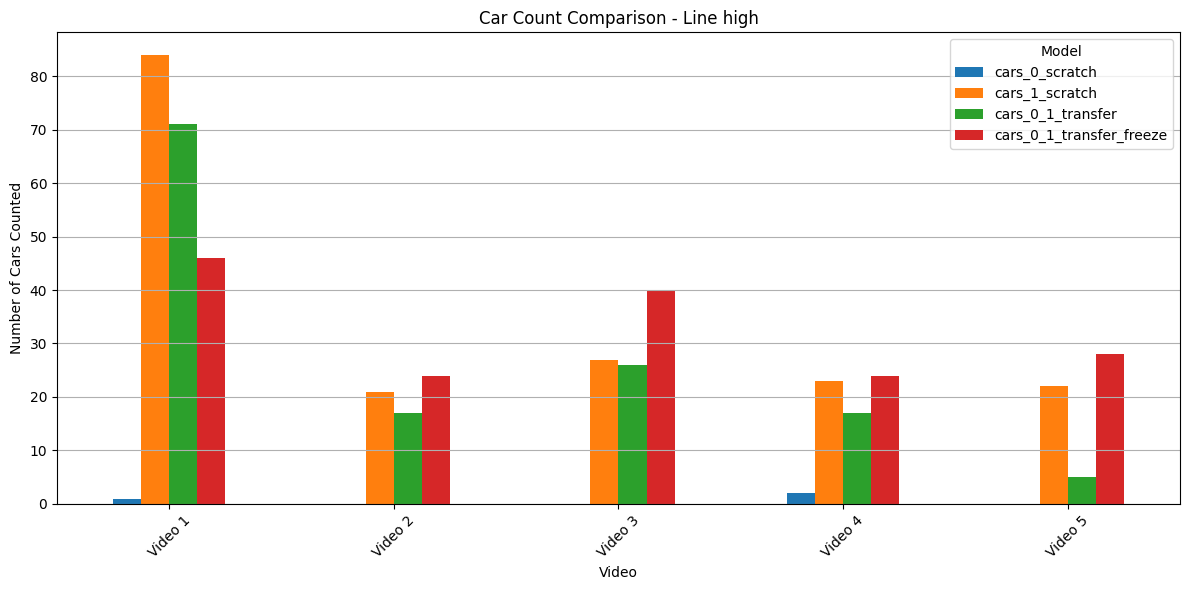

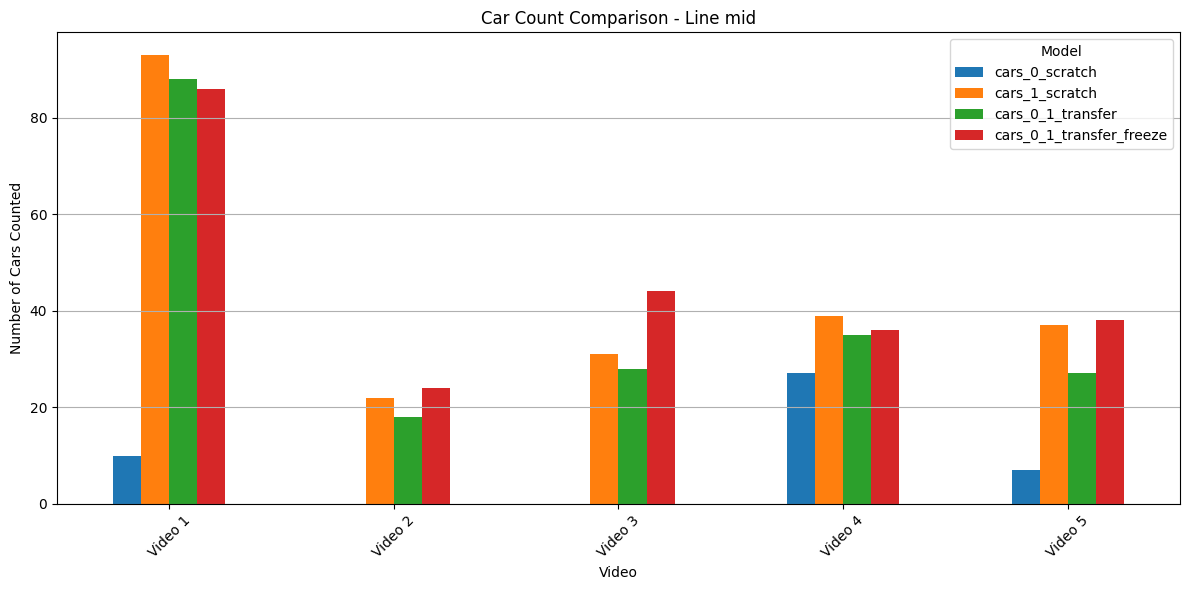

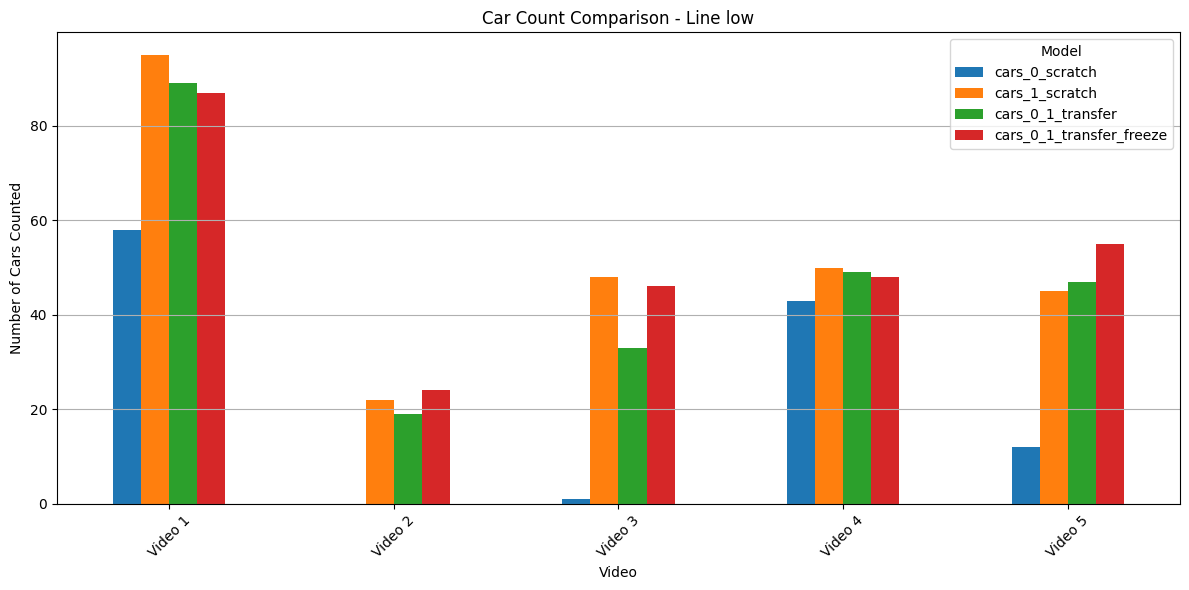

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Data in a structured format
data = {
    'Video': ['Video 1']*4 + ['Video 2']*4 + ['Video 3']*4 + ['Video 4']*4 + ['Video 5']*4,
    'Model': ['cars_0_scratch', 'cars_1_scratch', 'cars_0_1_transfer', 'cars_0_1_transfer_freeze'] * 5,
    'Line low': [58, 95, 89, 87, 0, 22, 19, 24, 1, 48, 33, 46, 43, 50, 49, 48, 12, 45, 47, 55],
    'Line mid': [10, 93, 88, 86, 0, 22, 18, 24, 0, 31, 28, 44, 27, 39, 35, 36, 7, 37, 27, 38],
    'Line high': [1, 84, 71, 46, 0, 21, 17, 24, 0, 27, 26, 40, 2, 23, 17, 24, 0, 22, 5, 28]


}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert models to consistent category for plotting
model_order = ['cars_0_scratch', 'cars_1_scratch', 'cars_0_1_transfer', 'cars_0_1_transfer_freeze']
df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)

# Function to plot
def plot_bar_chart_videos_x(line_type):
    subset = df[['Video', 'Model', line_type]].dropna()
    pivot_df = subset.pivot(index='Video', columns='Model', values=line_type)

    available_models = [model for model in model_order if model in pivot_df.columns]
    pivot_df = pivot_df[available_models]  # safe reorder

    # Plot (this creates the figure itself)
    pivot_df.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Car Count Comparison - {line_type}')
    plt.xlabel('Video')
    plt.ylabel('Number of Cars Counted')
    plt.xticks(rotation=45)
    plt.legend(title='Model')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Run for each line
plot_bar_chart_videos_x('Line high')
plot_bar_chart_videos_x('Line mid')
plot_bar_chart_videos_x('Line low')
